Import Library

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load Dataset

In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/h3rry/learning_ai/main/dataset/diabetes.csv"
df = pd.read_csv(url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Keterangan :

Pregnancies : Number of times pregnant
Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure : Diastolic blood pressure (mm Hg)
SkinThickness : Triceps skin fold thickness (mm)
Insulin : 2-Hour serum insulin (mu U/ml)
BMI : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction : Indikator riwayat diabetes dalam keluarga
Age : Age (years)
Outcome : 1 (positive diabetes), 0 (negative diabetes)

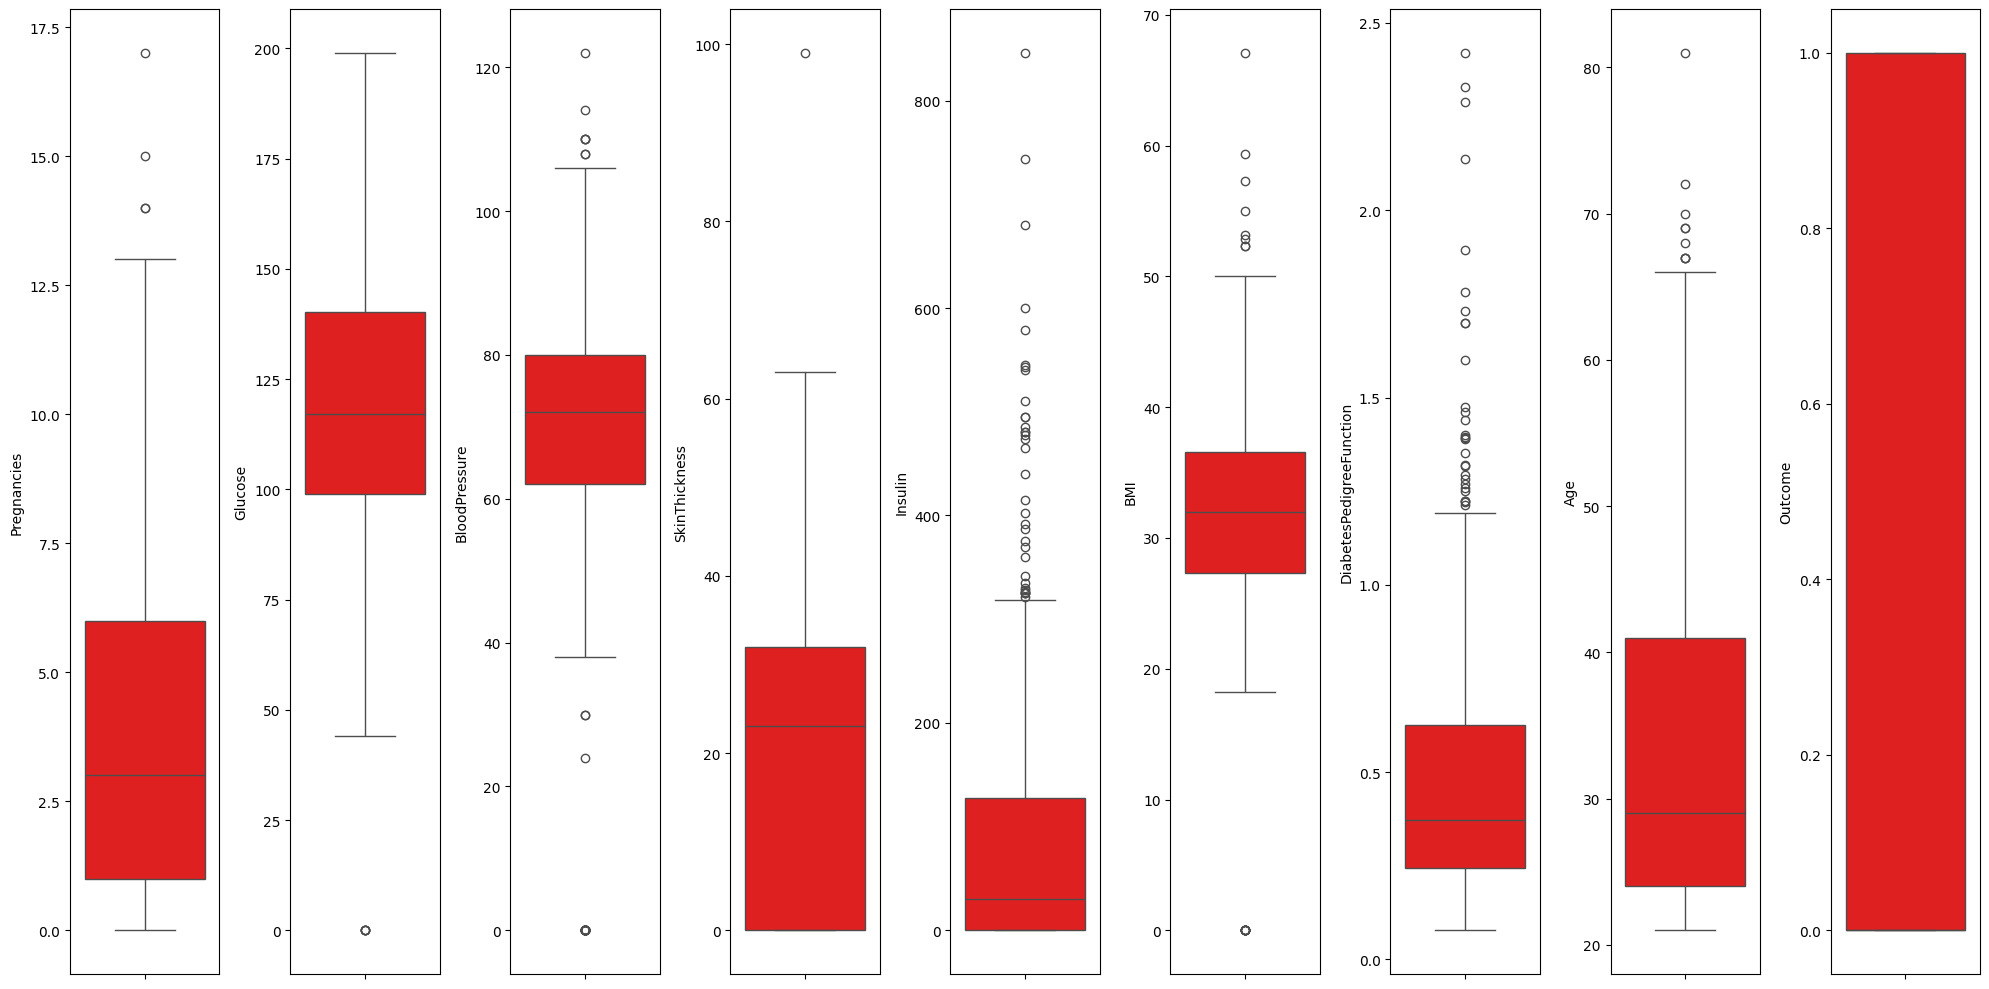

In [21]:
# adjust the figure size for better readability
plt.figure(figsize=(20,10))

# plotting
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Statistical Summary

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Ada kejanggalan dalam range nilai pada feature Glucose, Blood Pressure, Skin Thickness, Insulin, BMI walaupun tidak ada nilai minus dalam nilai minimum atau maksimumnya, tapi nilai minimumnya menunjukkan nilai 0, case ini tentunya tidak relevan karena pasien yang terdata masih hidup dan memiliki rentang usia 21-81 tahun.

Univariate Analysis

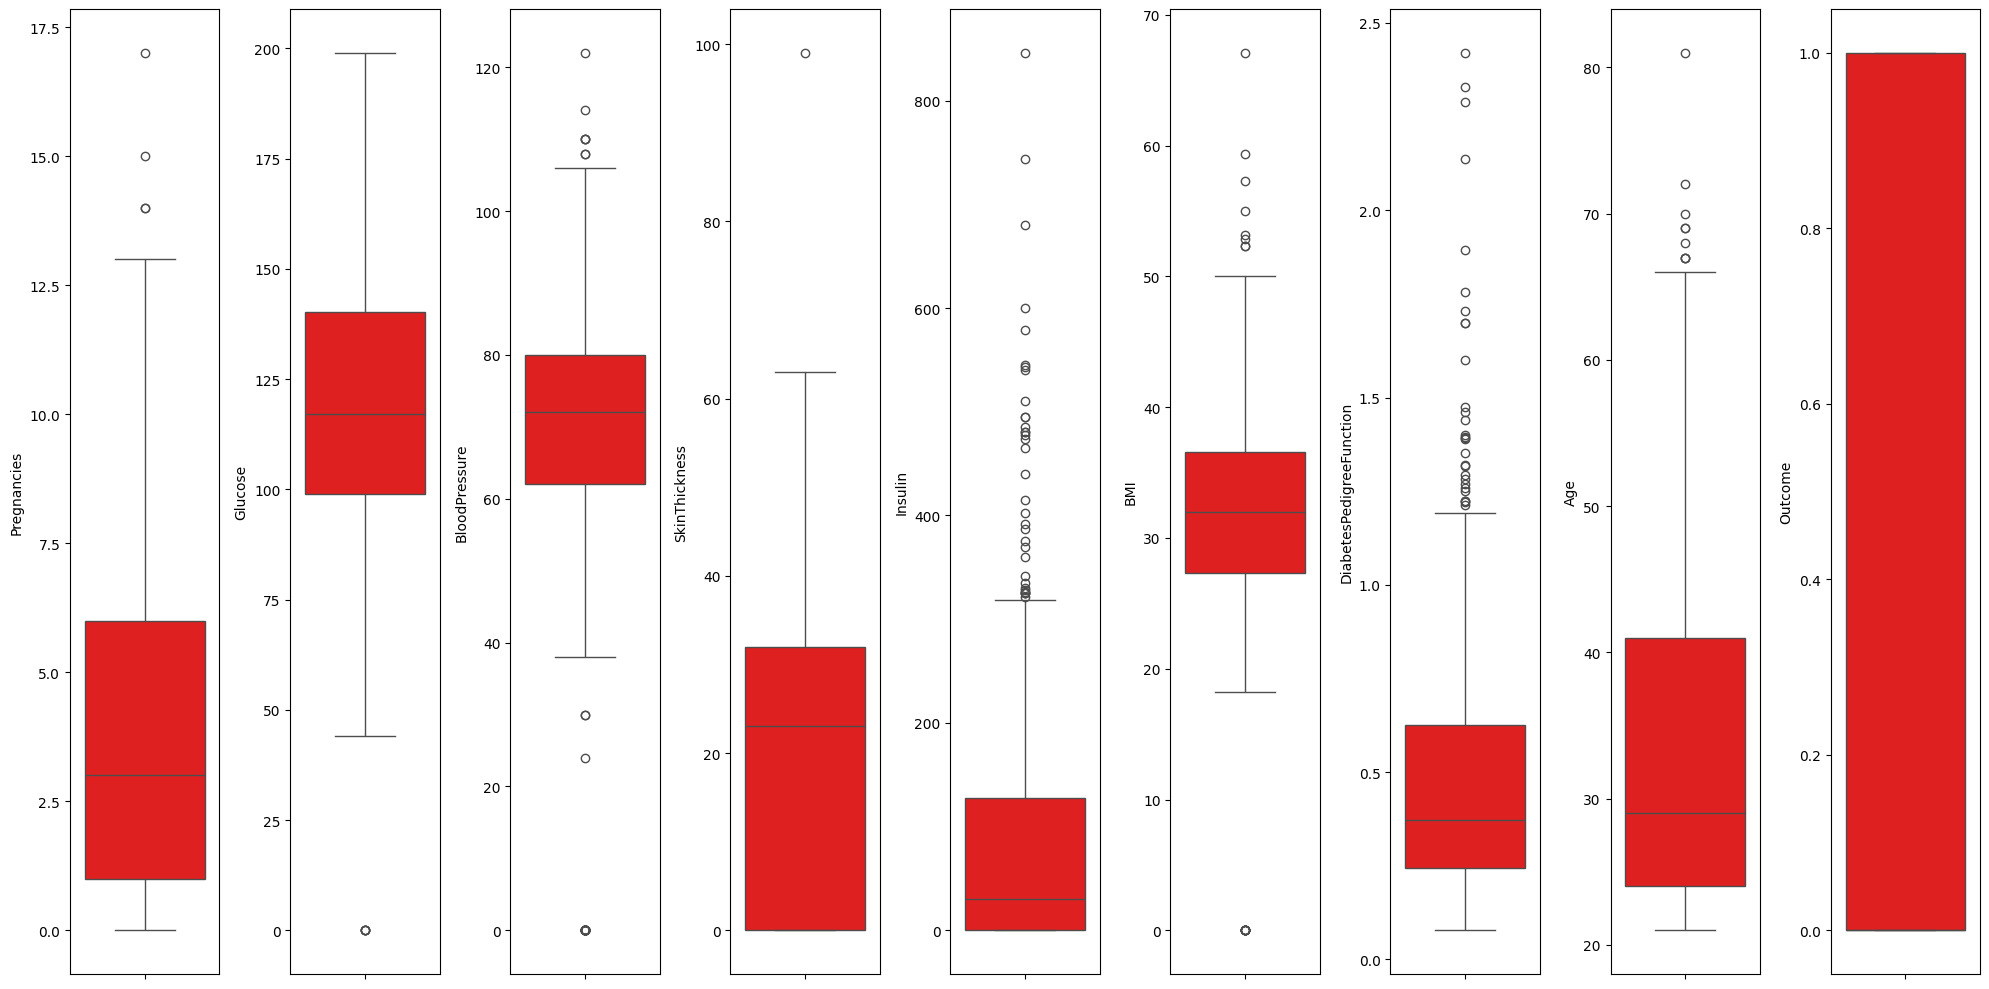

In [23]:
# adjust the figure size for better readability
plt.figure(figsize=(20,10))

# plotting
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

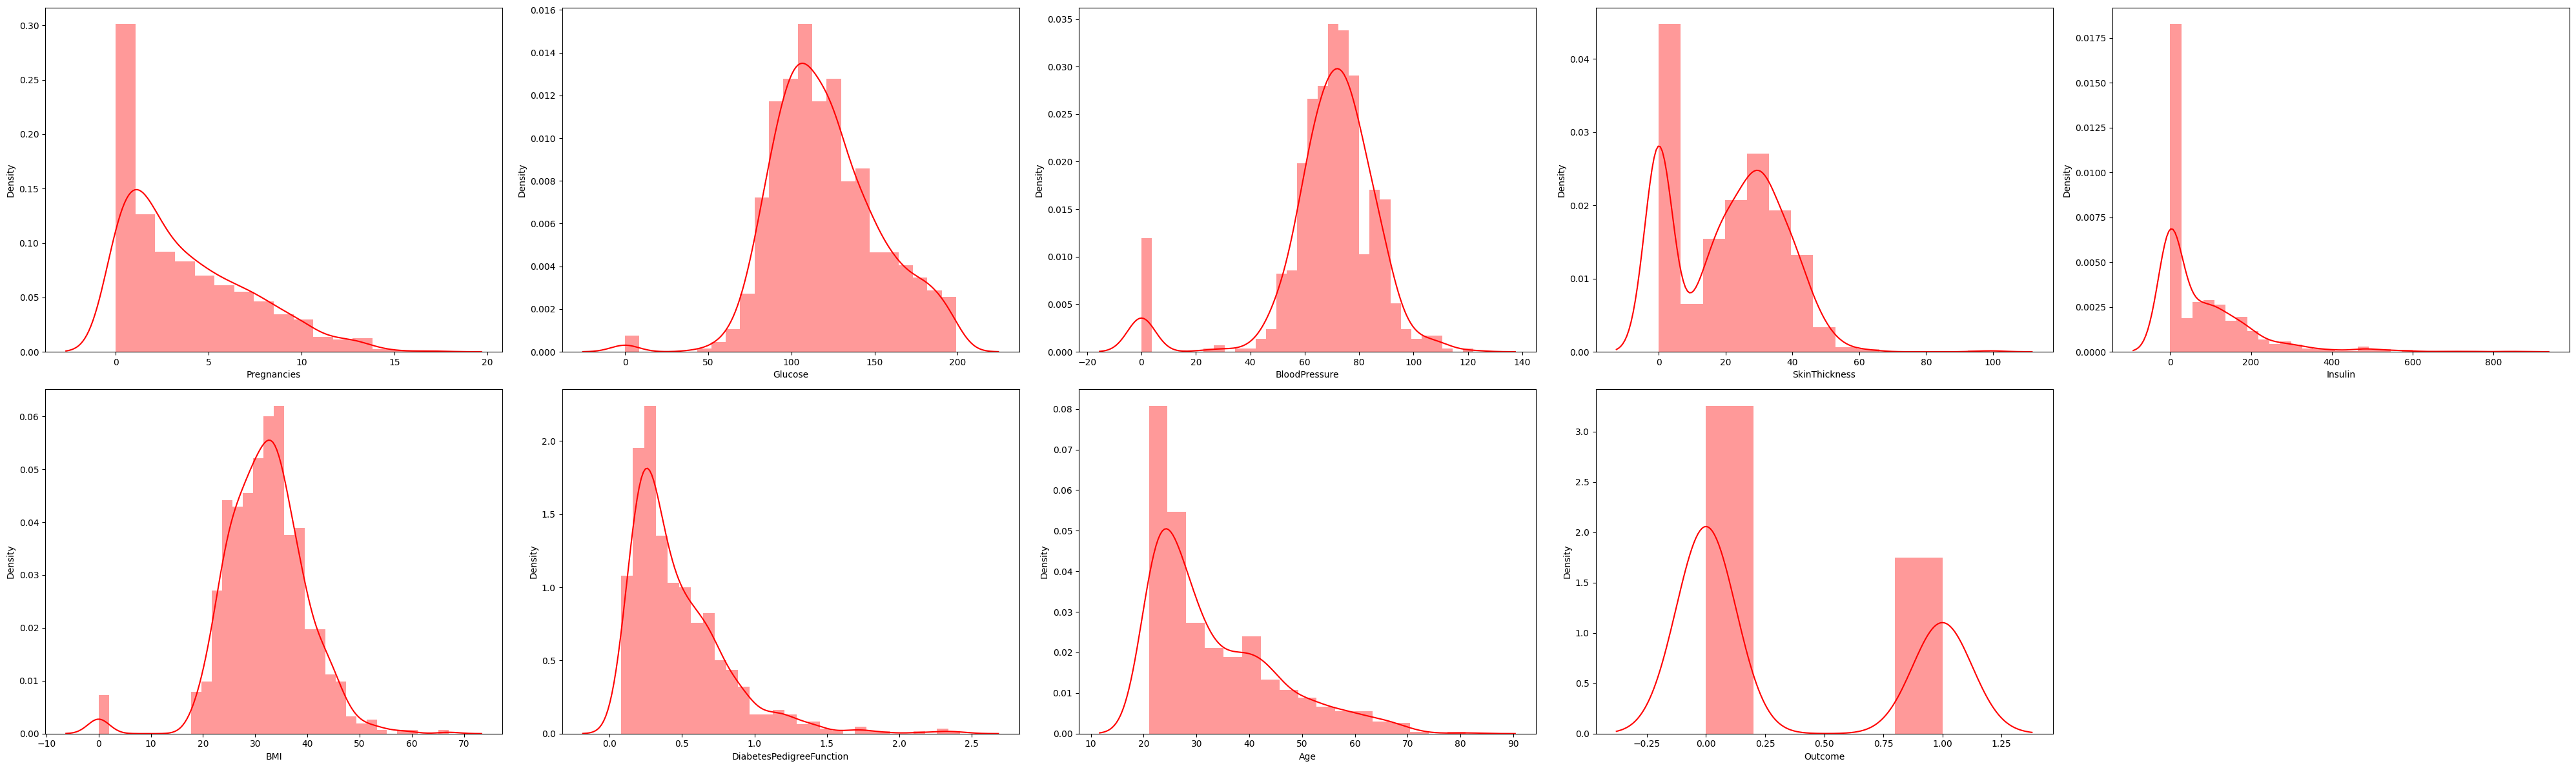

In [24]:
# adjust the figure size for better readability
plt.figure(figsize=(40,12))

#plotting
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

Multivariate Analysis

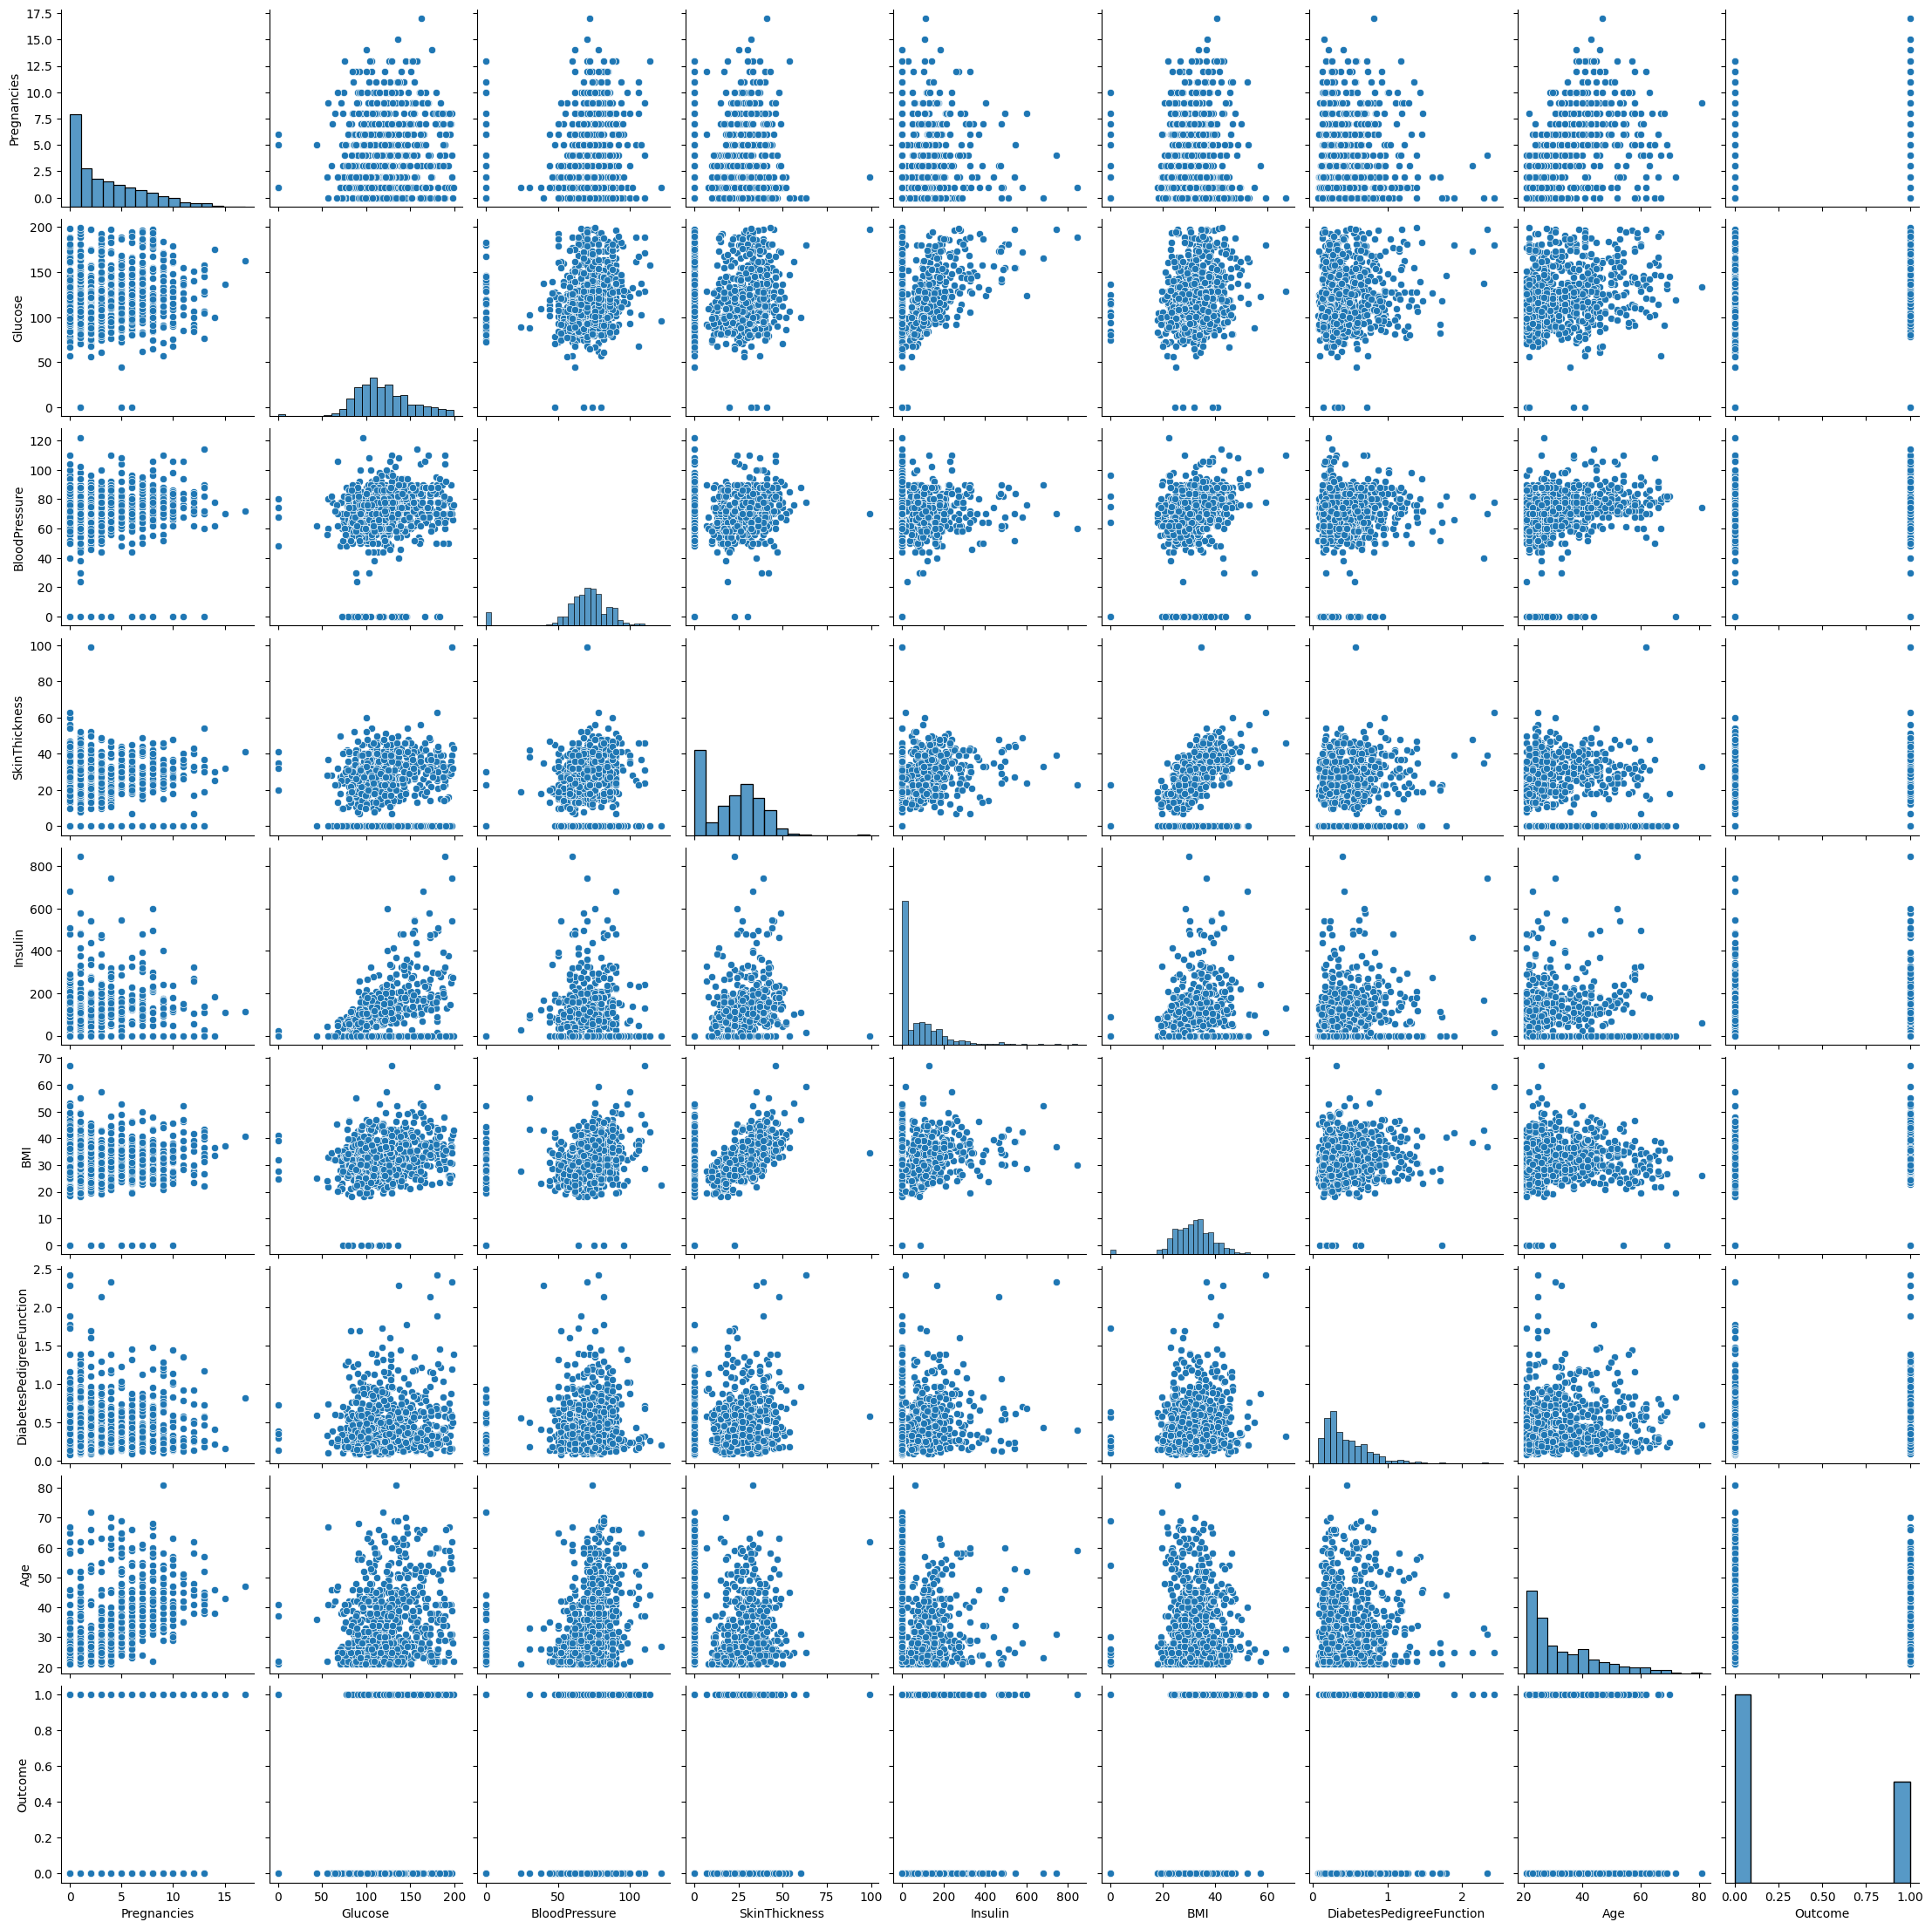

In [25]:
# pairplot of numerical data
sns.pairplot(df, palette="rainbow")

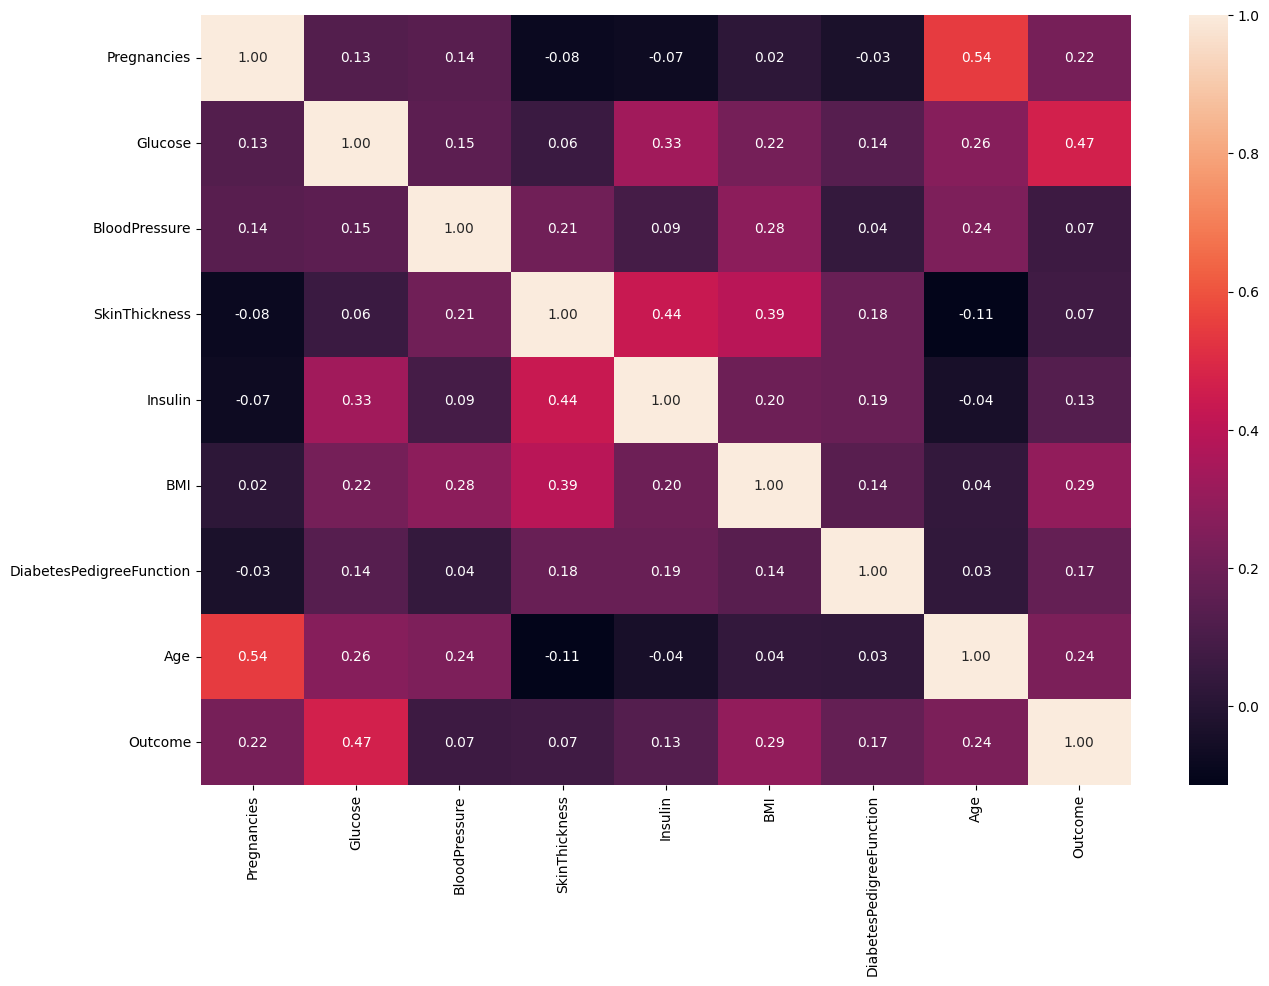

In [26]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

The Difference Between Healthy & Diabetes Person


In [29]:
# Membagi data berdasarkan kolom 'Outcome'
D = df[df['Outcome'] == 1]
H = df[df['Outcome'] == 0]

def density_plot(var, size_bin):
    # Pastikan bahwa kolom var ada di DataFrame
    if var not in df.columns:
        raise ValueError(f"Kolom '{var}' tidak ditemukan di DataFrame")

    tmp1 = D[var].dropna()  # Menghapus nilai NaN jika ada
    tmp2 = H[var].dropna()  # Menghapus nilai NaN jika ada

    hist_data = [tmp1, tmp2]
    labels = ['Diabetes', 'Healthy']
    color = ['Red', 'Blue']
    fig = ff.create_distplot(hist_data, labels, colors=color, show_hist=True, bin_size=size_bin, curve_type='kde')

    fig['layout'].update(title=var)

    py.iplot(fig, filename='Density plot')

a. Pregnancies of diabetes person is relatively same or higher than healthy person

In [30]:
density_plot('Pregnancies', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

b. Glucose of diabetes person is higher than healthy person

In [31]:
density_plot('Glucose', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

c. Blood Pressure of diabetes person is same or lower than healthy person

In [32]:
density_plot('BloodPressure', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

d. Skin Thickness of diabetes person is thicker than healthy person

In [33]:
density_plot('SkinThickness', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

e. Insulin of diabetes person is lower than healthy person

In [34]:
density_plot('Insulin', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

f. BMI of diabetes person is higher than healthy person

In [35]:
density_plot('BMI', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

g. Diabetes Pedigree Function of diabetes person is higher than healthy person

In [36]:
density_plot('DiabetesPedigreeFunction', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot

In [43]:
density_plot('Age', 0)  # Ganti 'BMI' dengan nama kolom yang ingin Anda plot